# Laning Phase vs. Objectives - Summer Split Analysis (LCS and LEC)

League of Legends is a multiplayer online battle arena (MOBA) video game developed and published by Riot Games for Microsoft Windows and macOS. It consists of 10 players, 5 on each team. I have started playing the game around the beginning of February. Ever since then, League of Legends has taken 3 years of my life filled with joy, exhilarating gameplay, laughter (memes), and to a certain extent, disappointment and frustration. But the beautiful MOBA game has so much depth and complexity in terms of tactics and learning 148 character, all with one goal in mind, to defeat the enemy's base (nexus). To get there though, players must adapt to the most effectives tactics available (or in short, the 'META') in order for the player and its team to gain the upperhand and improving its chances to win the game. 

Even when the META consistently change, the laning phase and capturing objectives will always be constant in the game. 

## Win lane..... win game? 

So what is the 'laning phase'? 

Based on leagueoflegends.fandom.com, "The Laning phase is the period of the game where the players, except for junglers, typically remain in their respective lanes and farm minions to acquire gold or trade with their lane opponents to get kills or lane dominance. This phase usually lasts the first 15 minutes."

So does winning laning phase guarantee a win? Not quite. 

#### Analysis on laning phase (LCS and LEC)

I have conducted a correlation analysis between four factors related to the laning phase that affect the result of the game. Keep in mind that a win is equal to 1 and a loss is equal to 0. Therefore, the data will be binary (data with only two possible outcomes of 1 and 0). It is worth noting that this analysis is not individually player focused. Rather, the chosen variables are collectively a team-based data. The four factors we will be working on is 'creep score difference at 15 minutes', 'experience difference at 15 minutes', 'gold difference at 15 minutes', and 'first blood'. I chose these four factors because laning phase usually lasts around the 15th minute mark. I will explain why each variable is relevant to my analysis on laning phase. 

Creep score is credited to a player that deals the 'last hit' on a killing blow of a minion or a monster. Minions in league of legends are units that automatically attack anyone or anything on their way. Once a player hits an opposing player, minions will automatically attack the player that initially dealt damage within range. Players with a high creep score is essential as they obtain experience points to level up and gold to buy their desired items. 

Experience is acquired when a player solo kills its opposing player, assists in killing its opponent, nearby opposing minions are dead, killing or are in proximity to a ward death, and killing "last hitting" monsters. Having an advantage over experience allows for players to level up their abilities much quicker and will be a threat to its opposing laner. 

There are many ways to acquire gold. The main ways to obtain gold is by solo killing or assisting an oppposing player, last hitting minions or monsters, and last hitting a ward. Having a gold difference will allow players to obtain items that adds to their skill points. This gives an edge over an opposing laner. 

'First blood' is credited to the player that obtains the first kill of the game by killing its opposing player. First blood grants 400 gold and 50 gold to the assist bounty. 

When a player has an advantage in laning phase, it is said to affect the results of the game. Will this be the case? Let us see the analysis. 

***We will be analyzing professional games gathered from the League European Championship (LEC) and the League Championship Series (LCS)***

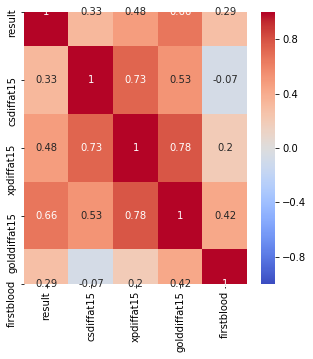

,result,csdiffat15,xpdiffat15,golddiffat15,firstblood
result,1.000000,0.331984,0.481042,0.657884,0.288889
csdiffat15,0.331984,1.000000,0.730234,0.525296,-0.069578
xpdiffat15,0.481042,0.730234,1.000000,0.781915,0.197524
golddiffat15,0.657884,0.525296,0.781915,1.000000,0.424944
firstblood,0.288889,-0.069578,0.197524,0.424944,1.000000


In [2]:
import pandas as pd
import numpy as np
week2 = pd.read_csv('summer_week2.csv')
temp = week2[week2.league.isin(['LEC','LCS'])]
NA_EU = temp[temp.position.isin(['team'])]

import matplotlib.pyplot as plt
import seaborn as sb
earlygame = NA_EU[['result','csdiffat15','xpdiffat15','golddiffat15','firstblood']]

plt.figure(figsize=(5,5))
sb.heatmap(earlygame.corr(),vmin=-1, cmap='coolwarm', annot=True)
plt.show()
earlygame.corr()

C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


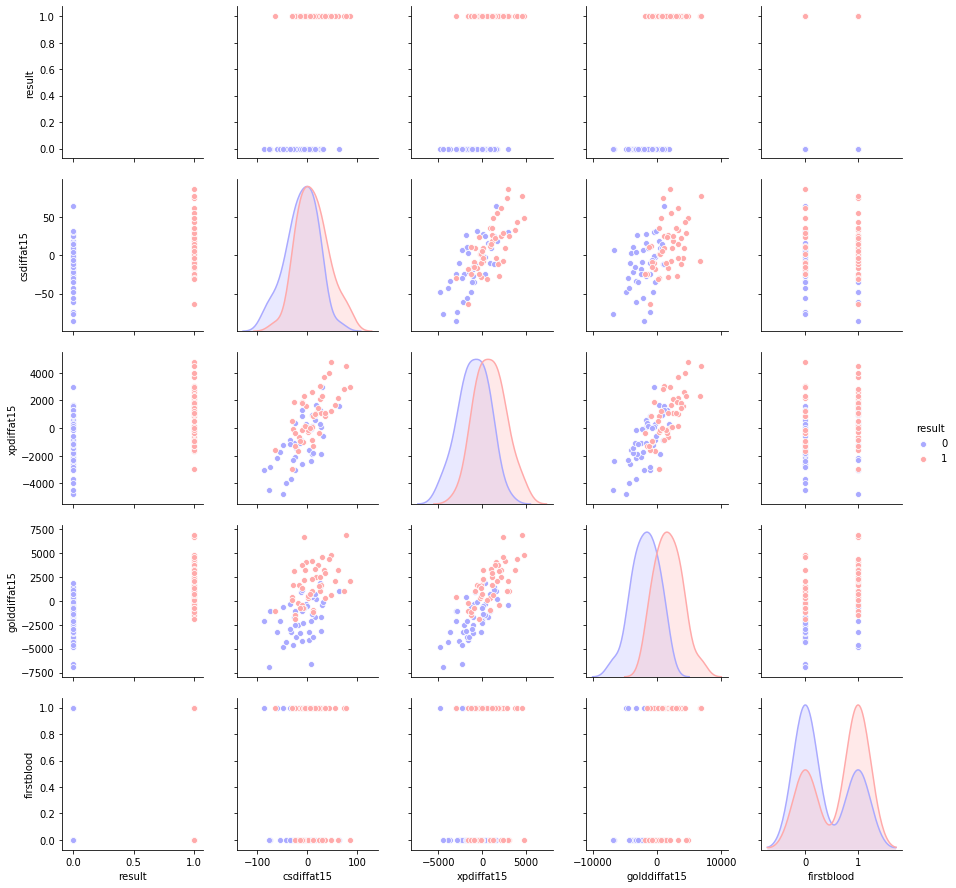

In [3]:
sb.pairplot(earlygame,hue='result',palette='bwr')

As we can see, having a better creep score and experience points in contrast to an opposing team are NOT highly correlated to the outcome of the game while having a team gold difference has a higher impact to the result of the game. Why? 

We will investigate further but for now, we will create a model that can predict the outcome of the game based on laning phase variable. We will use the machine learning method called, 'Logistic Regression'. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
X = earlygame[['csdiffat15', 'xpdiffat15', 'golddiffat15','firstblood']]
y = earlygame['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        18
           1       0.71      0.83      0.77        12

    accuracy                           0.80        30
   macro avg       0.79      0.81      0.80        30
weighted avg       0.81      0.80      0.80        30



C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Our model did not predict into the standard we were expecting (above 90 percent precision) for both wins and losses. This could mean that laning phase as a whole is not a good predictor of the result of the game. But what is? 

As we have seen from our correlation analysis, gold difference at 15 minutes highly affects the outcome of the game. However, acquiring gold is not only through the means of killing opposing players and minion. Acquiring gold could also be in the form of obtaining objectives. 

## Objectively seeking a win!

Taking down objectives gives a team-wide advantage to any team who controls it. There are mainly six objectives in league of legends such as towers, dragons, heralds, elder dragon, baron, and inhibitors before taking down the nexus. Will taking down objectives outperform the laning phase? 

#### Analysis on objectives (LCS and LEC)

I have conducted a correlation analysis between six factors related to objectives that affect the result of the game. As I have mentioned earlier, towers, dragons, heralds, elder dragon, and baron are key objectives of the game. I will explain what each objective is and why it is important to take them down. 

Towers (also called 'turrets') deal damage to enemies who are on sight. Once a player hits an opponent, the opposing tower will automatically target the player. Within the first 14 minutes of the game, the first outer turrets contain 5 plates. For each plate destroyed, it grants 160 gold to players and must be shared if teammates assisted in destroying it. Taking down the first turret in the game grants bonus gold to the killer. Taking down towers in general gives additional global gold and local gold (a player that took down the turret). Taking down towers is important because it grants the whole team bonus gold in order to gain an item advantage over the opposing team. 

Dragons are also an important objective to take down. There are different types of dragons but to summarize why it is important, it gives teams special abilities (also called 'buff') over the opposing team. There are five dragons: infernal, mountain, ocean, cloud, and elder dragon. Each spawn randomly each unique game. Taking down infernal dragons grants teams bonus damage. Mountain dragons grants teams the ability to give bonus damage to other objectives. Ocean dragon grants teams bonus regeneration of health, having the luxury to sustain post-team fights or securing other objectives. Cloud drake grants bonus movement speed, good for rotations around the map. Elder dragon is the hardest to kill and grants the strongest buff out of all dragons. Elder dragon grants teams true damage, a burn to on-hit targets, and an execution (execution occurs when an opponent is below a certain percentage of health). Taking down dragons certainly gives an edge over opposing teams. 

Rift heralds, once captured and activated, it pushes to the closes lane for tower destruction. Rift heralds charges up a power attack on turret structures while losing 66% of its health. This gives teams a better chance at destroying towers for a chance to obtain more gold. 

Slaying baron grants arguably the best buff in the game. During its duration of the buff, it grants players bonus damage plus empowered minions. Equipping this buff is good for pushing lanes with a greater chance of taking down turrets and inhibitors. 

Once a team destroys an inhibitor, the team is granted superminions. Superminions are powerful minions with melee range that are harder to kill. While superminions have spawned, teams have the luxury to either take down other objectives while the opposing team is occupied trying to kill superminions, or teams can push with superminions to attempt to destroy the nexus. 

***We will be analyzing professional games gathered from the League European Championship (LEC) and the League Championship Series (LCS)***

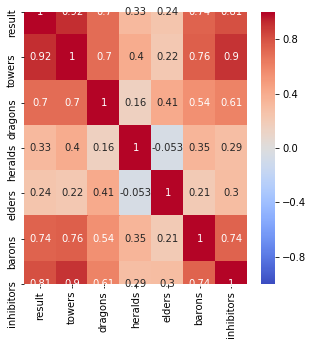

,result,towers,dragons,heralds,elders,barons,inhibitors
result,1.000000,0.918926,0.701002,0.326720,0.242536,0.737309,0.809701
towers,0.918926,1.000000,0.702642,0.401997,0.221505,0.756508,0.903321
dragons,0.701002,0.702642,1.000000,0.155609,0.409431,0.540295,0.605461
heralds,0.326720,0.401997,0.155609,1.000000,-0.052827,0.345726,0.290892
elders,0.242536,0.221505,0.409431,-0.052827,1.000000,0.210615,0.296967
barons,0.737309,0.756508,0.540295,0.345726,0.210615,1.000000,0.739374
inhibitors,0.809701,0.903321,0.605461,0.290892,0.296967,0.739374,1.000000


In [11]:
objectives = NA_EU[['result','towers','dragons','heralds','elders','barons','inhibitors']]

plt.figure(figsize=(5,5))
sb.heatmap(objectives.corr(),vmin=-1, cmap='coolwarm', annot=True)
plt.show()
objectives.corr()

C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


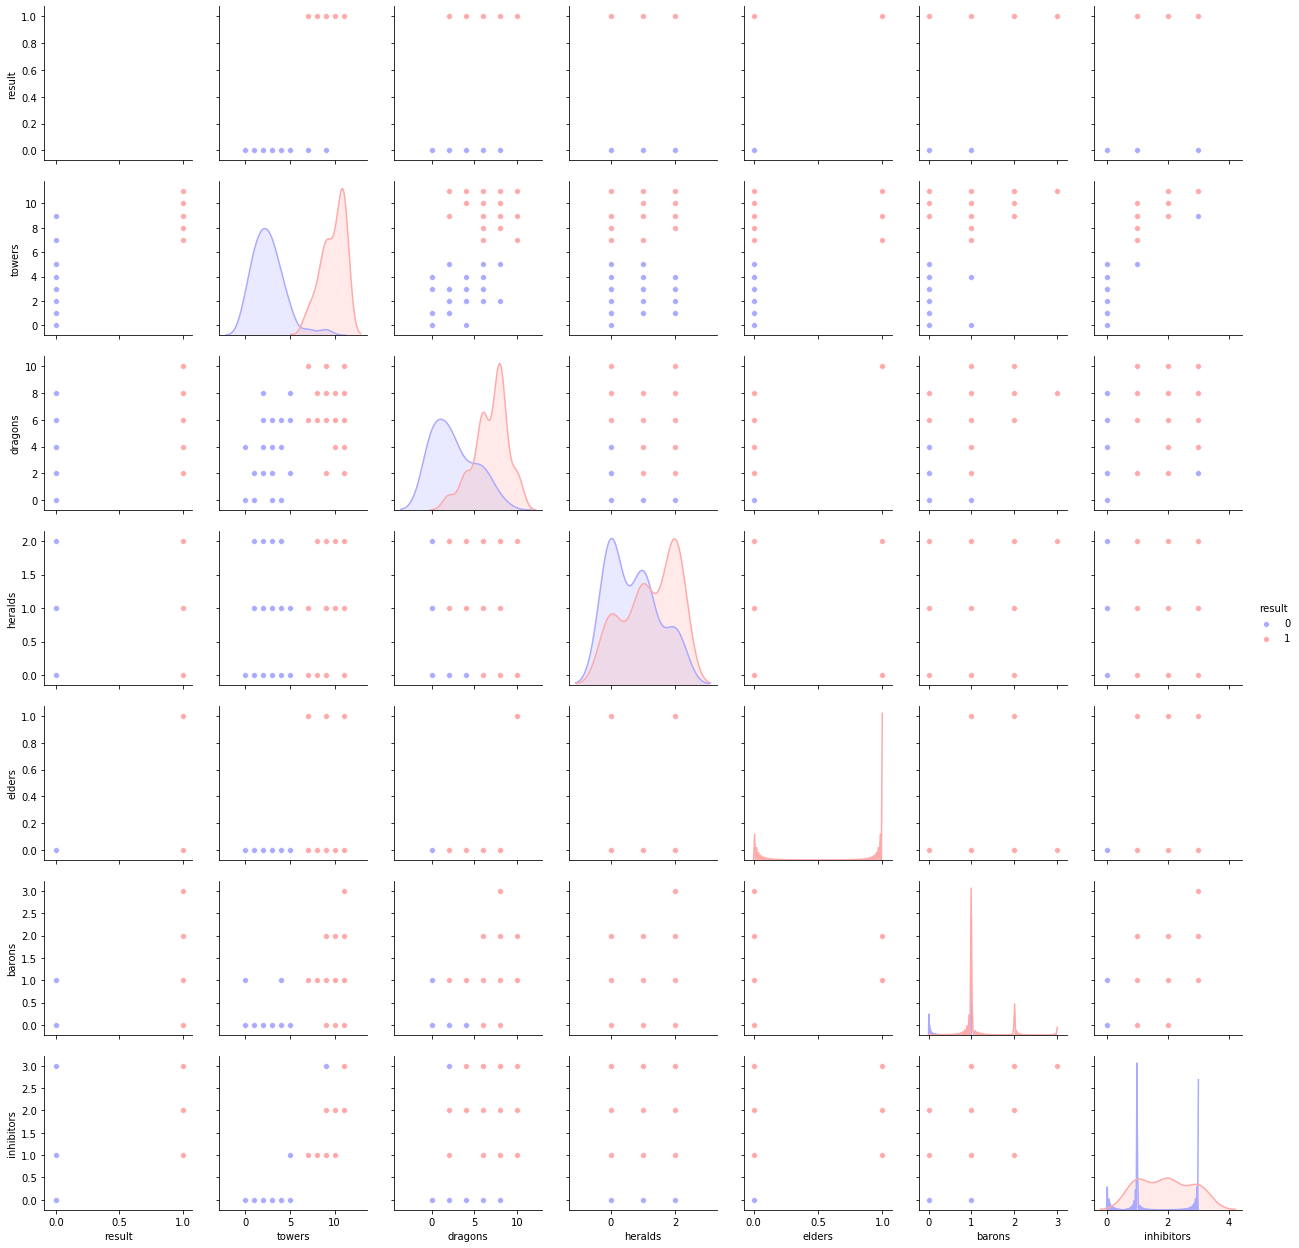

In [12]:
sb.pairplot(objectives,hue='result',palette='bwr')

Most objectives heavily affect the game as evident by the correlation analysis and the data visualizations. Taking down towers has the highest correlation to results. This could be because of the benefits turrets gives to a team alongside the fact that for each passing turret, it leaves the nexus exposed. 

I will now create a model that will predict the outcome of the game based on objectives. I will be using the same logistic regression algorithm. 

In [14]:
X = objectives[['towers','dragons','heralds', 'elders', 'barons', 'inhibitors']]
y = objectives['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\markm\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The model acccurately predicts the outcome of a game based on objectives. It provides a perfect precision score on the given test set. This is an indicator that having objectives as a predictor to predict the results is a solid choice. 

## Conclusion

From the analysis, it is evident that taking down objectives outweigh the impact of laning phase to the result of a game by a wide margin. Can this analysis be trusted? Unforunately for me and you, not quite. Keep in mind that I have gathered data from professional League of Legends games and is not represented of the entire population. I was not able to gather data from regular players across the region. Also, the skills and ranks of these respective professional gamers compared to regular players has a considerably enormous gap. 

From my personal experience playing the game however, I can confidently say that taking down objectives is way more important than doing well in the laning phase. The better question should be "does the laning phase heavily affect taking down objectives?" But I will leave that research for another day.

But for now, it does not matter if a player does well during the laning phase and it also does not mean "win lane, win game."

Rather, "win objectives, win game." 

## Reference


- https://www.mobafire.com/league-of-legends/wiki/buffs/aspect-of-the-dragon
- https://leagueoflegends.fandom.com/wiki/Farming#:~:text=Gold%20is%20granted%20to%20the,represents%20the%20champion's%20total%20farm.
- https://boosteria.org/guides/league-legends-objectives-guide#:~:text=Objective%20in%20LoL%20is%20an,%2C%20Baron%20Nashor%2C%20and%20Turrets.
- https://leagueoflegends.fandom.com/wiki/Kill
- https://leagueoflegends.fandom.com/wiki/Turret
- https://www.riftherald.com/lol-gameplay/2019/11/20/20974075/preseason-elemental-drakes-elder-dragon-soul-spawn-summoners-rift-changes
- https://leagueoflegends.fandom.com/wiki/Rift_Herald
- https://leagueoflegends.fandom.com/wiki/Hand_of_Baron
- https://leagueoflegends.fandom.com/wiki/Inhibitor
- https://leagueoflegends.fandom.com/wiki/Super_minion
- https://leagueoflegends.fandom.com/f/p/3120688743317535042#:~:text=The%20Laning%20phase%20is%20the,get%20kills%20or%20lane%20dominance.
- https://boosteria.org/guides/league-legends-objectives-guide#:~:text=Objective%20in%20LoL%20is%20an,%2C%20Baron%20Nashor%2C%20and%20Turrets.